# Análise dos Microdados do ENEM 2023

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter

In [3]:
microdadosEnem = pd.read_csv("C:/Users/Samuel Marlon/Desktop/samuel/Ciência de Dados PUC/analise_enem/microdados_enem_2023/DADOS/MICRODADOS_ENEM_2023.csv", sep=";", encoding='ISO-8859-1')

In [4]:
microdadosEnem.head()
microdadosEnem.tail()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
3933950,210061959676,2023,12,M,1,1,1,1,6,1,...,B,A,A,C,A,B,E,A,A,B
3933951,210061950911,2023,1,F,1,1,2,3,0,1,...,B,A,B,C,B,B,B,B,C,B
3933952,210061965966,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,B
3933953,210061932304,2023,2,M,1,1,1,2,0,3,...,B,B,B,C,A,A,D,A,C,B
3933954,210058924455,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,B,A,D,A,B,B


In [5]:
microdadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [6]:
colunasSelecionadasEnem = ['TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO','NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

In [7]:
microdadosEnemSelecionado = microdadosEnem.filter(items=colunasSelecionadasEnem)

In [9]:
microdadosEnemSelecionado.head()
microdadosEnemSelecionado.tail()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
3933950,12,M,1,1,1,1,6,1,NaN,0,...,B,A,A,C,A,B,E,A,A,B
3933951,1,F,1,1,2,3,0,1,NaN,1,...,B,A,B,C,B,B,B,B,C,B
3933952,3,F,1,3,1,2,0,2,1.0,0,...,A,A,A,B,A,A,B,A,A,B
3933953,2,M,1,1,1,2,0,3,1.0,0,...,B,B,B,C,A,A,D,A,C,B
3933954,3,F,1,3,1,2,0,2,1.0,0,...,A,A,A,B,B,A,D,A,B,B


In [10]:
microdadosEnemSelecionado.columns.values

array(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001',
       'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
       'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017',
       'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025'],
      dtype=object)

## Nº de registros por estado

In [11]:
coluna_no_municipio_residencia = microdadosEnemSelecionado['SG_UF_ESC']

In [12]:
coluna_no_municipio_residencia.value_counts()

SG_UF_ESC
SP    187067
CE     98595
MG     66972
RJ     63842
PR     54226
GO     45796
PE     44881
BA     43453
RS     39700
PA     35212
MA     31877
SC     31480
AM     26557
PB     24870
AL     20934
ES     20626
DF     20113
PI     18393
MT     16792
RN     16776
MS     11894
SE     10277
RO     10209
TO      7336
AP      4240
AC      4111
RR      2277
Name: count, dtype: int64

<b>OBS:</b> O total de registros de todos os estados <b>(958506)</b> não condiz com o total de candidatos <b>(3933954)</b>. Isso se deve ao alto número de registros nulos nesse campo do formulário.

In [13]:
freq_estado = coluna_no_municipio_residencia.value_counts()

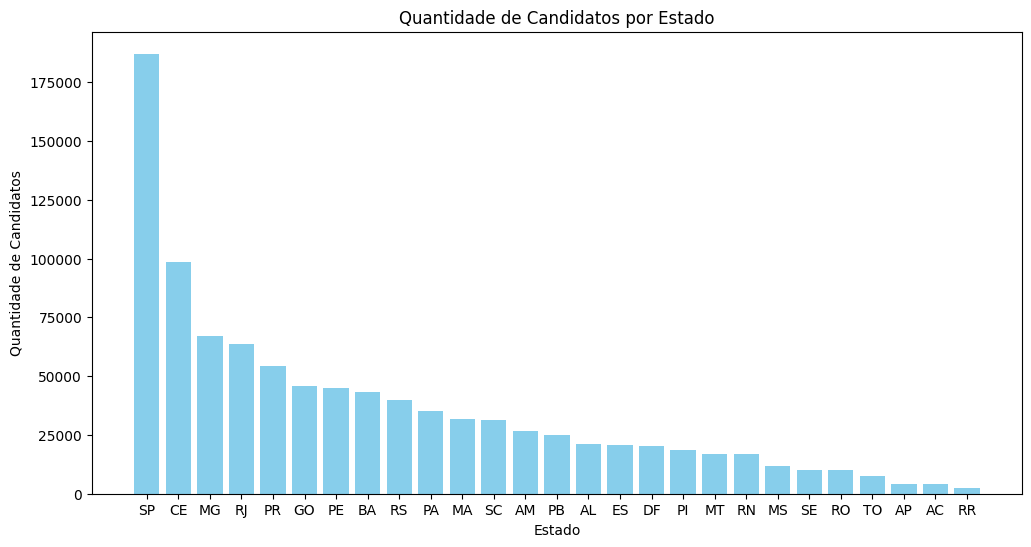

In [14]:
plt.figure(figsize=(12,6))
grafico = plt.bar(freq_estado.index, freq_estado, color='skyblue')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Candidatos')
plt.title('Quantidade de Candidatos por Estado')
plt.show()

## Nº de registros por faixa etária

In [15]:
coluna_faixa_etaria = microdadosEnemSelecionado['TP_FAIXA_ETARIA']

In [16]:
coluna_faixa_etaria.value_counts().sort_index()

TP_FAIXA_ETARIA
1     347434
2     753800
3     905047
4     431592
5     267383
6     183401
7     137884
8     111813
9      91359
10     73127
11    246292
12    133381
13     96927
14     67135
15     40791
16     24619
17     13439
18      5503
19      2161
20       867
Name: count, dtype: int64

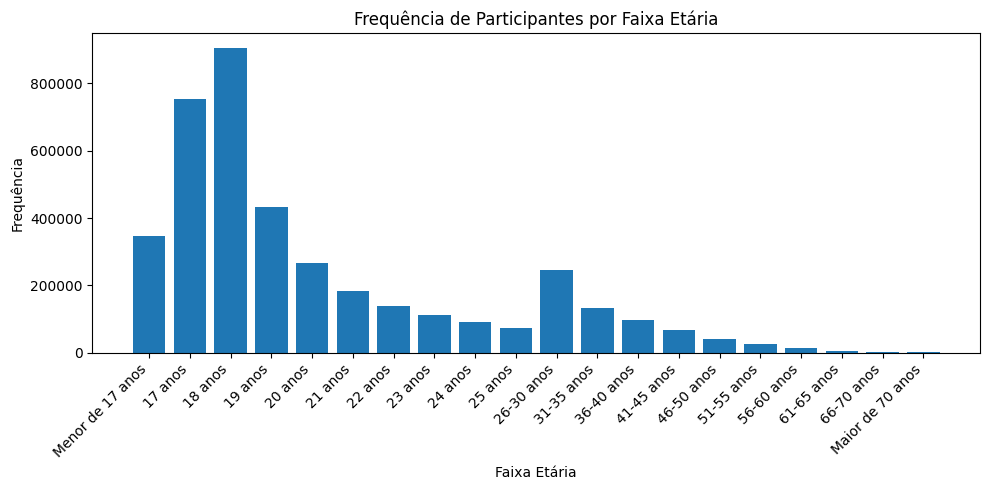

In [17]:
frequencia_faixa_etaria = coluna_faixa_etaria.value_counts().sort_index()
faixas_etarias = {
    1: 'Menor de 17 anos', 2: '17 anos', 3: '18 anos', 4: '19 anos', 5: '20 anos',
    6: '21 anos', 7: '22 anos', 8: '23 anos', 9: '24 anos', 10: '25 anos',
    11: '26-30 anos', 12: '31-35 anos', 13: '36-40 anos', 14: '41-45 anos',
    15: '46-50 anos', 16: '51-55 anos', 17: '56-60 anos', 18: '61-65 anos',
    19: '66-70 anos', 20: 'Maior de 70 anos'
}

# Converte os índices numéricos para rótulos descritivos
frequencia_faixa_etaria.index = frequencia_faixa_etaria.index.map(faixas_etarias)

# Gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(frequencia_faixa_etaria.index, frequencia_faixa_etaria.values, color='tab:blue')

# Ajuste de títulos e rótulos
plt.xlabel('Faixa Etária')
plt.ylabel('Frequência')
plt.title('Frequência de Participantes por Faixa Etária')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos para facilitar a leitura
plt.tight_layout()  # Ajusta para evitar sobreposição
plt.show()

## Nº de registros por sexo

In [18]:
# Seleciona a coluna que indica o sexo dos participantes
coluna_sexo = microdadosEnemSelecionado['TP_SEXO']

# Conta a frequência de cada valor (número de participantes do sexo masculino e feminino)
freq_sexo = coluna_sexo.value_counts()
print(freq_sexo) 

TP_SEXO
F    2411185
M    1522770
Name: count, dtype: int64


In [19]:
# Converte as frequências absolutas para percentuais (dividindo cada valor pelo total e multiplicando por 100)
porcent_sexo = [100 * x / freq_sexo.sum() for x in freq_sexo]
porcent_sexo 

[np.float64(61.291626365832855), np.float64(38.708373634167145)]

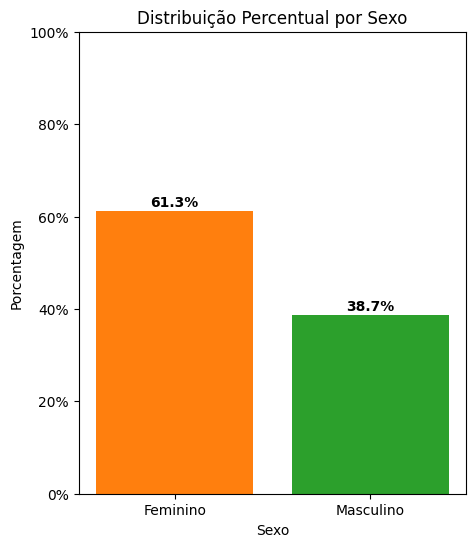

In [20]:
# Define as cores para cada barra
bar_colors = ['tab:orange', 'tab:green']

rotulo_sexo = ['Feminino', 'Masculino']

plt.figure(figsize=(5, 6))

plt.bar(rotulo_sexo, porcent_sexo, color=bar_colors)

# Define o formato do eixo y como porcentagem para que os valores sejam exibidos com o símbolo '%' 
plt.gca().yaxis.set_major_formatter(PercentFormatter())

# Ajusta o limite superior do eixo Y para 100%, garantindo que toda a escala percentual seja exibida
plt.ylim(0, 100)

plt.title('Distribuição Percentual por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Porcentagem')

# Exibe o valor exato da porcentagem acima de cada barra
for i, v in enumerate(porcent_sexo):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')  # v+1 Coloca o valor da porcentagem 1 unidade acima da barra
plt.show()

## Desempenho em Redação por Renda da Familía

In [21]:
colunas_redacao_renda = microdadosEnemSelecionado[['Q006', 'NU_NOTA_REDACAO']]
colunas_redacao_renda.head()

,Q006,NU_NOTA_REDACAO
0,F,NaN
1,H,NaN
2,C,700.0
3,C,880.0
4,B,560.0


In [22]:
#Limpa os dados retirando os valores N/A (NaN)
colunas_redacao_renda = colunas_redacao_renda.dropna() 
colunas_redacao_renda.head()

,Q006,NU_NOTA_REDACAO
2,C,700.0
3,C,880.0
4,B,560.0
9,F,600.0
10,B,860.0


In [23]:
descricao_redacao_renda = colunas_redacao_renda.groupby('Q006').describe()
print(descricao_redacao_renda)

     NU_NOTA_REDACAO                                                          
               count        mean         std  min    25%    50%    75%     max
Q006                                                                          
A           166267.0  521.426982  218.096492  0.0  420.0  540.0  640.0  1000.0
B           828092.0  559.034697  216.727346  0.0  460.0  560.0  700.0  1000.0
C           439169.0  592.036779  205.930055  0.0  480.0  600.0  720.0  1000.0
D           311880.0  613.938374  203.772513  0.0  520.0  620.0  760.0  1000.0
E           220090.0  635.839884  201.295260  0.0  520.0  640.0  780.0  1000.0
F           132945.0  654.038136  199.483481  0.0  540.0  660.0  800.0  1000.0
G           210022.0  674.401063  195.755006  0.0  560.0  680.0  840.0  1000.0
H           114874.0  693.646430  193.285565  0.0  580.0  700.0  860.0  1000.0
I            71944.0  708.954187  188.540665  0.0  600.0  720.0  860.0  1000.0
J            63847.0  720.681316  186.200953  0.0  6

In [24]:
#colunas_redacao_renda.groupby('Q006').hist()

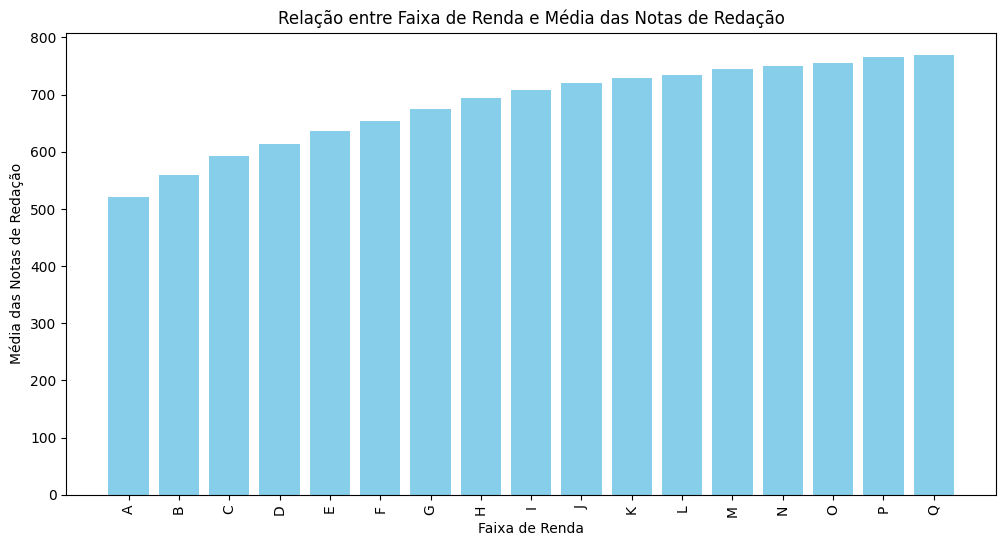

In [30]:
media_renda = colunas_redacao_renda.groupby('Q006')['NU_NOTA_REDACAO'].mean()

plt.figure(figsize=(12, 6))
plt.bar(media_renda.index, media_renda.values, color='skyblue')
plt.xlabel('Faixa de Renda')
plt.ylabel('Média das Notas de Redação')
plt.title('Relação entre Faixa de Renda e Média das Notas de Redação')
plt.xticks(rotation=90)
plt.show()

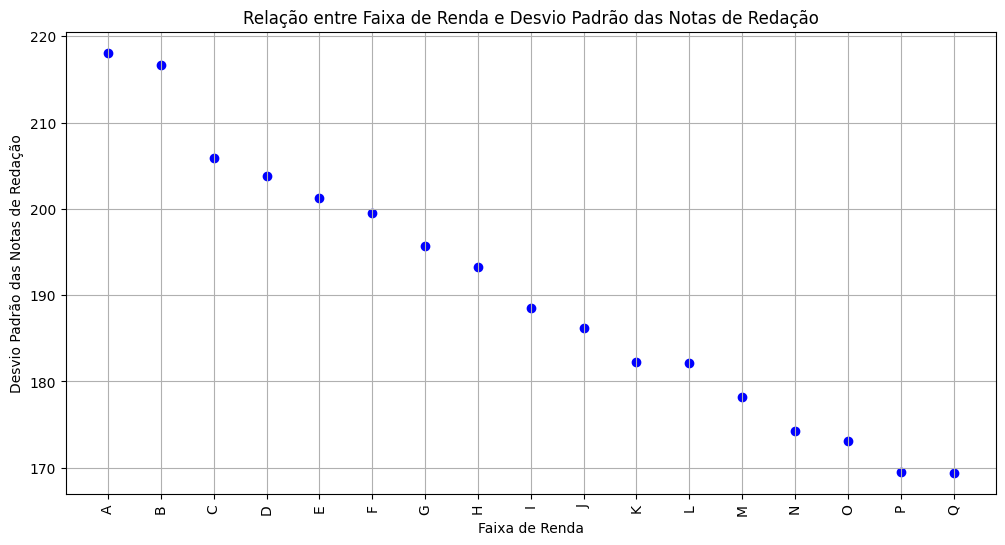

In [33]:
desvio_padrao_renda = colunas_redacao_renda.groupby('Q006')['NU_NOTA_REDACAO'].std()

# Cria o gráfico de dispersão
plt.figure(figsize=(12, 6))
plt.scatter(desvio_padrao_renda.index, desvio_padrao_renda.values, color='blue', marker='o')
plt.xlabel('Faixa de Renda')
plt.ylabel('Desvio Padrão das Notas de Redação')
plt.title('Relação entre Faixa de Renda e Desvio Padrão das Notas de Redação')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

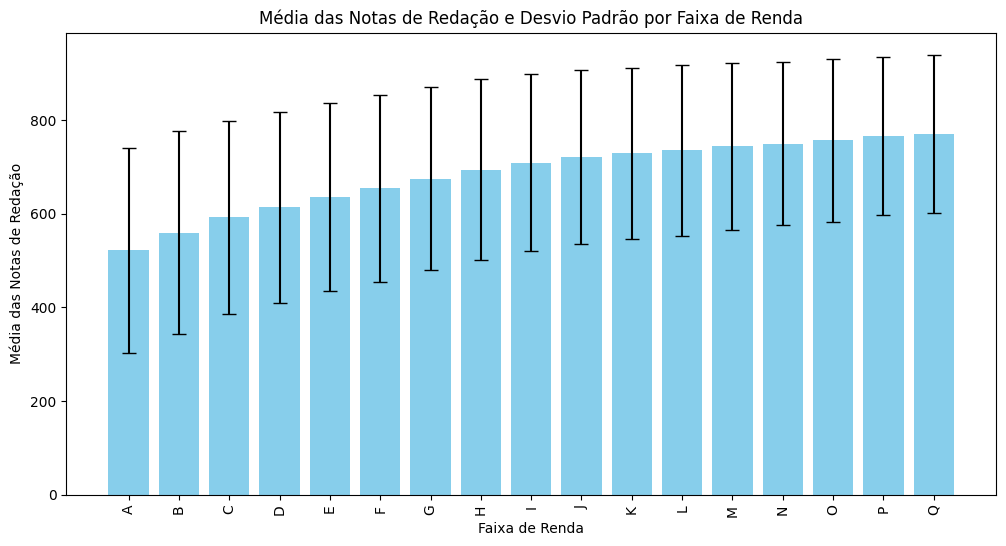

In [34]:
descricao = colunas_redacao_renda.groupby('Q006')['NU_NOTA_REDACAO'].agg(['mean', 'std'])

# Configurando o gráfico de barras de erro
plt.figure(figsize=(12, 6))
plt.bar(descricao.index, descricao['mean'], yerr=descricao['std'], capsize=5, color='skyblue')
plt.xlabel('Faixa de Renda')
plt.ylabel('Média das Notas de Redação')
plt.title('Média das Notas de Redação e Desvio Padrão por Faixa de Renda')
plt.xticks(rotation=90)
plt.show()

In [ ]:
faixa_renda = {
    'A': "Nenhuma Renda", 'B': 'Até R$ 1.320,00', 'C': 'De R$ 1.320,01 até R$ 1.980,00', 
    'D': 'De R$ 1.980,01 até R$ 2.640,00', 'E': 'De R$ 2.640,01 até R$ 3.300,00', 'F': 'De R$ 3.300,01 até R$ 3.960,00', 
    'G': 'De R$ 3.960,01 até R$ 5.280,00','H': 'De R$ 5.280,01 até R$ 6.600,00', 'I': 'De R$ 6.600,01 até R$ 7.920,00', 
    'J': 'De R$ 7.920,01 até R$ 9.240,00', 'K': 'De R$ 9.240,01 até R$ 10.560,00', 'L': 'De R$ 10.560,01 até R$ 11.880,00', 
    'M': 'De R$ 11.880,01 até R$ 13.200,00', 'N': 'De R$ 13.200,01 até R$ 15.840,00', 'O': 'De R$ 15.840,01 até R$ 19.800,00',
    'P': 'De R$ 19.800,01 até R$ 26.400,00', 'Q': 'Acima de R$ 26.400,00'
}
  

In [ ]:
faixa_renda_nominal = colunas_redacao_renda.Q006 = colunas_redacao_renda.Q006.map(faixa_renda)


In [ ]:
descricao = colunas_redacao_renda.groupby('Q006').describe()
descricao_ordenada = descricao.sort_values(by=('NU_NOTA_REDACAO', 'mean'))
descricao_ordenada

In [ ]:
#colunas_redacao_renda.groupby('Q006').hist()
#descricao_ordenada.groupby('Q006').hist()

In [ ]:
#colunas_redacao_renda.groupby('Q006').mean()

In [ ]:
# colunas_redacao_renda.groupby('Q006')['NU_NOTA_REDACAO'].agg(['mean', 'std'])

# # Configurando o gráfico de barras de erro
# plt.figure(figsize=(12, 6))
# plt.errorbar(descricao.index, descricao['mean'], yerr=descricao['std'], fmt='o-', capsize=5, color='blue')
# plt.xlabel('Faixa de Renda')
# plt.ylabel('Média das Notas de Redação')
# plt.title('Média das Notas de Redação e Desvio Padrão por Faixa de Renda')
# plt.xticks(rotation=90)
# plt.grid()
# plt.show()